# Introduction

In this project, we want to automate (in real time) loan approval based on information from customers' online application. We achieve this by developing some Machine Learning (ML) models to predict the loan approval which is aimed at accelerating the decision-making process and determining if an applicant is eligible for a loan or not.

## Objectives


   * Perform Exploratory Data Analysis (EDA)
   * Clean and Preprocess the data for Analysis and modeling
   * Build various ML models to predict loan approvals
   * Evaluate and Compare the different Models built

### The machine learning models used
 
* Logistic Regression
* K-Nearest Neighbour (KNN)
* Support Vector Machine (SVM)
* Decision Tree
* Random Forest
* Gradient Boost
 

### Importing the needed Libraries

In [1126]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid") # set the background for the graphs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#handling missing value
from sklearn.impute import SimpleImputer

#importing warning library ignoring unwanted error message
import warnings
warnings.filterwarnings("ignore")


#import Algorithm libaries for feature importance, data processing, modeling & evaluation
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier

#Algorithms for handling Imbalance Data
from imblearn.over_sampling import SMOTE, ADASYN
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid") # set the background for the graphs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#handling missing value
from sklearn.impute import SimpleImputer

#importing warning library ignoring unwanted error message
import warnings
warnings.filterwarnings("ignore")


#import Algorithm libaries for feature importance, data processing, modeling & evaluation
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier

#Algorithms for handling Imbalance Data
from imblearn.over_sampling import SMOTE, ADASYN


### Load the Data Set

In [1127]:
# The code was removed by Watson Studio for sharing.

df = pd.read_csv("loan-train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis (EDA) using functions and Visualizations

In [1128]:
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

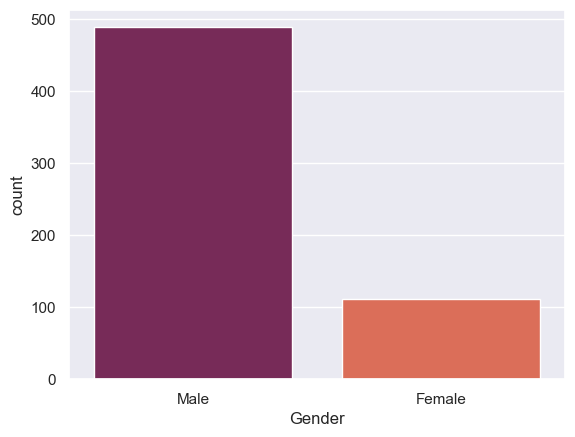

In [1129]:
sns.countplot(x="Gender", data=df, palette="rocket")
plt.show()

In [1130]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


**Inference:** It can be seen that the dataset contains more male applicants than female applicants. Also, there are missing values in this column.

In [1131]:
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

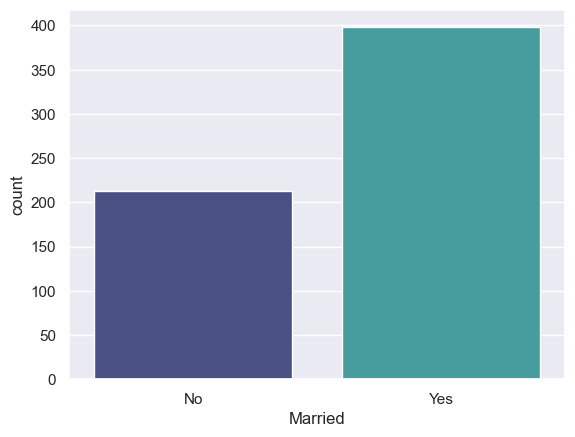

In [1132]:
sns.countplot(x="Married", data=df, palette="mako")
plt.show()

In [1133]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


**Inference:** It can be seen that from the dataset, there are more married applicants than unmarried applicants. Also, there are missing values in this column.

In [1134]:
df.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

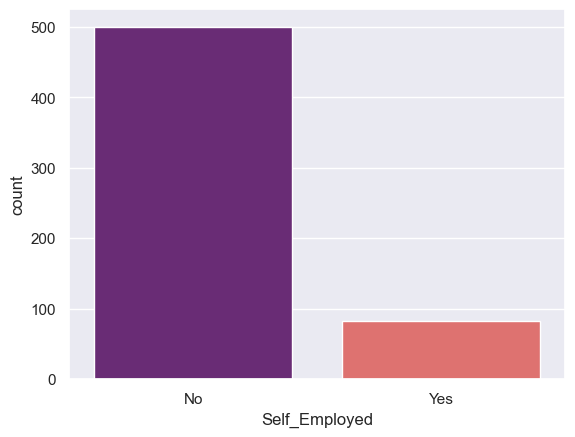

In [1135]:
sns.countplot(x="Self_Employed", data=df, palette="magma")
plt.show()

In [1136]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


**Inference:** It can be seen that from the dataset, there are more applicants that are not self-employed than the self-employed applicants. Also, there are missing values in this column.

In [1137]:
df.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

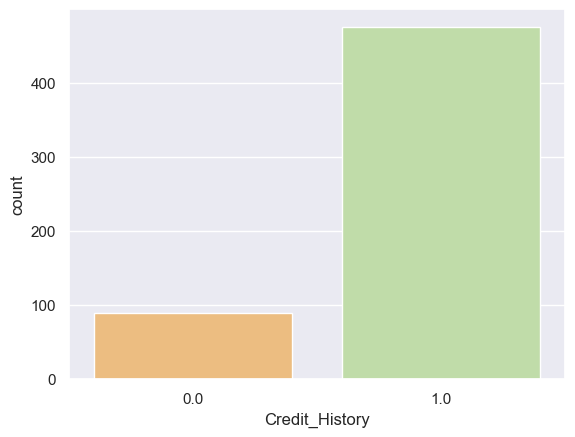

In [1138]:
sns.countplot(x="Credit_History", data=df, palette="Spectral")
plt.show()

In [1139]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


**Inference:** It can be seen that from the dataset, there are more applicants with Good Credit History than those with Bad Credit History. Also, there are missing values in this column.

In [1140]:
df.Loan_Status.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

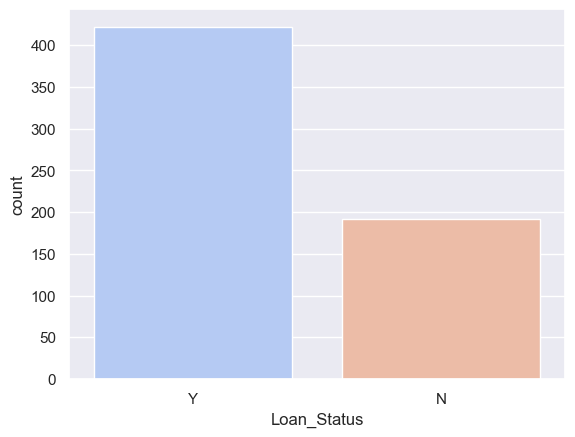

In [1141]:
sns.countplot(x="Loan_Status", data=df, palette="coolwarm")
plt.show()

In [1142]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


**Inference:** The dataset has higher Loan approval than rejection. Also, there are no missing values in this column.

In [1143]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


**Inference:** This is a brief summary of numerical variables in the dataset

<Axes: title={'center': 'Correlation of variables'}>

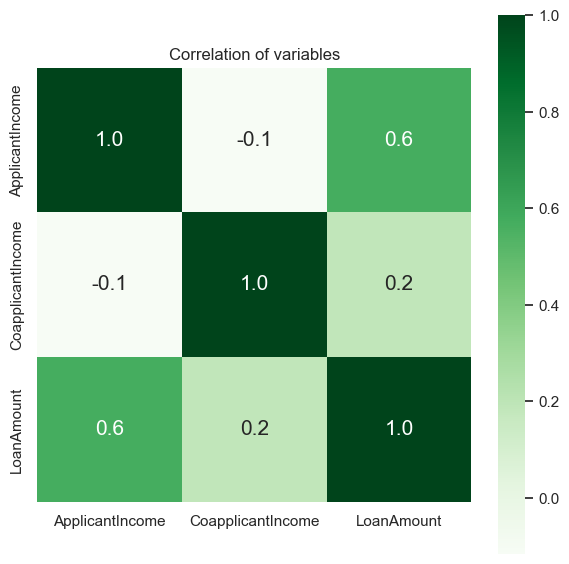

In [1144]:
plt.figure(figsize=(7,7))
plt.title('Correlation of variables')
corr = df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True, cmap='Greens', cbar=True, square= True, fmt='.1f', annot_kws={'size':15})


**Inference:** There is positive correlation between Loan Amount and Applicant Income

# Data Cleaning and Preprocessing

In [1145]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Null Values in the dataset**

In [1146]:
df = df.drop(['Loan_ID'], axis = 1)

**Drop Unecessary Variables**

In [1147]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


**Here, we use the mode to perform data imputation (substitute missing values with close estimations) and remove all null values in the dataset**

In [1148]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,4583,1508.0,128.000000,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,66.000000,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,2583,2358.0,120.000000,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,6000,0.0,141.000000,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True


In [1149]:

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == np.number:
        continue
    else:
        df[col] = le.fit_transform(df[col])

**Here, we transform the categorical variables into binary form that is understandable by the ML algorithms.**

In [1150]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

**Remove Outliers & Infinite values**

In [1151]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,376,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
4,381,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
13,24,2840.0,114.000000,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0
15,337,0.0,125.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
19,91,3500.0,115.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1


In [1152]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

**Normalize skewed data using Square Root Transformation**

In [1153]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

**Feature selection**

**Avoid overfitting using the SMOTE Technique**

**Data Normalization**

In [1154]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [1155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (187, 16) (187,)
Test set: (47, 16) (47,)


In [1156]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# fit to train

**Splitting the data into 80% for training set and 20% for test set.**

# Model Development and Evaluation

In [1157]:
# LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
# LRclassifier.fit(X_train, y_train)

# y_pred = LRclassifier.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# LRAcc = accuracy_score(y_pred,y_test)
# print('LR accuracy: {:.2f}%'.format(LRAcc*100))

**Logistic Regression Model**

In [1158]:
# scoreListknn = []
# for i in range(1,21):
#     KNclassifier = KNeighborsClassifier(n_neighbors = i)
#     KNclassifier.fit(X_train, y_train)
#     scoreListknn.append(KNclassifier.score(X_test, y_test))
    
# plt.plot(range(1,21), scoreListknn)
# plt.xticks(np.arange(1,21,1))
# plt.xlabel("K value")
# plt.ylabel("Score")
# plt.show()
# KNAcc = max(scoreListknn)
# print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

**K-Nearest Neighbour (KNN) Model**

In [1159]:
# from sklearn import metrics
# Ks = 10
# mean_acc = np.zeros((Ks-1))
# std_acc = np.zeros((Ks-1))

# for n in range(1,Ks):
    
#     #Train Model and Predict  
#     neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
#     yhat=neigh.predict(X_test)
#     mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
#     std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

# mean_acc

**Calculate the accuracy of KNN for different values of k**

In [1160]:
# plt.plot(range(1,Ks),mean_acc,'g')
# plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
# plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
# plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
# plt.ylabel('Accuracy ')
# plt.xlabel('Number of Neighbors (K)')
# plt.tight_layout()
# plt.show()

**Plot the model accuracy for a different number of neighbors**

In [1161]:
# print( "The best accuracy was with", mean_acc.max(), "which was K=", mean_acc.argmax()+1)

In [1162]:
# scoreListDT = []
# for i in range(2,21):
#     DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
#     DTclassifier.fit(X_train, y_train)
#     scoreListDT.append(DTclassifier.score(X_test, y_test))
    
# plt.plot(range(2,21), scoreListDT)
# plt.xticks(np.arange(2,21,1))
# plt.xlabel("Leaf")
# plt.ylabel("Score")
# plt.show()
# DTAcc = max(scoreListDT)
# print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

**Decision Tree Model**

In [1163]:
# SVCclassifier = SVC(kernel='rbf', max_iter=500)
# SVCclassifier.fit(X_train, y_train)

# y_pred = SVCclassifier.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# SVCAcc = accuracy_score(y_pred,y_test)
# print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

**Support Vector Machine (SVM) Model**

In [1164]:
# scoreListRF = []
# for i in range(2,25):
#     RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
#     RFclassifier.fit(X_train, y_train)
#     scoreListRF.append(RFclassifier.score(X_test, y_test))
    
# plt.plot(range(2,25), scoreListRF)
# plt.xticks(np.arange(2,25,1))
# plt.xlabel("RF Value")
# plt.ylabel("Score")
# plt.show()
# RFAcc = max(scoreListRF)
# print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

**Random Forest Model**

In [1165]:
# paramsGB={'n_estimators':[100,200,300,400,500],
#       'max_depth':[1,2,3,4,5],
#       'subsample':[0.5,1],
#       'max_leaf_nodes':[2,5,10,20,30,40,50]}
# GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
# GB.fit(X_train, y_train)
# GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
# GBclassifier.fit(X_train, y_train)

# y_pred = GBclassifier.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# GBAcc = accuracy_score(y_pred,y_test)
# print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

**Gradient Boosting Model**

# Comparing the various ML Models

In [1166]:
# compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
#                                   'SVM', 'Decision Tree', 
#                                   'Random Forest', 'Gradient Boost'], 
#                         'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
#                                      DTAcc*100, RFAcc*100, GBAcc*100]})
# compare.sort_values(by='Accuracy', ascending=False)

In [1167]:
# Defining the classifiers
import xgboost as xgb
# Defining the classifiers
classifiers = [
    LogisticRegression(solver='saga', max_iter=500, random_state=1),
    SVC(kernel="rbf", max_iter=500,C=0.025, probability=True),
    DecisionTreeClassifier(random_state = 40),
    RandomForestClassifier(random_state = 40, n_estimators = 100),
    KNeighborsClassifier(),
    xgb.XGBClassifier(objective = "binary:logistic", random_state = 42),
    # AdaBoostClassifier(),
    lgb.LGBMClassifier()
]

In [1168]:
results = []

for classifier in classifiers:
    # Train and predict using ADASYN resampled data
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Add results to list
    results.append({
        'Classifier': classifier.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })
    
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {classifier.__class__.__name__}:\n{cm}\n")

Confusion Matrix for LogisticRegression:
[[13  6]
 [ 7 21]]

Confusion Matrix for SVC:
[[19  0]
 [28  0]]

Confusion Matrix for DecisionTreeClassifier:
[[15  4]
 [ 2 26]]

Confusion Matrix for RandomForestClassifier:
[[18  1]
 [ 2 26]]

Confusion Matrix for KNeighborsClassifier:
[[16  3]
 [ 1 27]]

Confusion Matrix for XGBClassifier:
[[17  2]
 [ 0 28]]

[LightGBM] [Info] Number of positive: 89, number of negative: 98
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 187, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475936 -> initscore=-0.096331
[LightGBM] [Info] Start training from score -0.096331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [1169]:
# Convert results list to pandas DataFrame
df_results = pd.DataFrame(results)

# Display results DataFrame
print(df_results)

               Classifier  Accuracy  Precision    Recall        F1
0      LogisticRegression  0.723404   0.777778  0.750000  0.763636
1                     SVC  0.404255   0.000000  0.000000  0.000000
2  DecisionTreeClassifier  0.872340   0.866667  0.928571  0.896552
3  RandomForestClassifier  0.936170   0.962963  0.928571  0.945455
4    KNeighborsClassifier  0.914894   0.900000  0.964286  0.931034
5           XGBClassifier  0.957447   0.933333  1.000000  0.965517
6          LGBMClassifier  0.851064   0.920000  0.821429  0.867925


In [1170]:
import pickle

model = classifiers[5]
model.fit(X_train, y_train)

with open('model.pickle', 'wb') as pickle_file:
    pickle.dump(model, pickle_file)